In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input
import numpy as np

from dataset import load_hoda

In [14]:
X_train_orignal, y_train_orignal, X_test_orignal, y_test_orignal = load_hoda()

In [15]:
y_train = keras.utils.to_categorical(y_train_orignal,num_classes=10)
y_test = keras.utils.to_categorical(y_test_orignal,num_classes=10)

In [16]:
X_train = X_train_orignal.astype('float32')
X_test = X_test_orignal.astype('float32')
X_train /= 255  # because each pixel is 0-255
X_test /= 255

In [65]:
X_train[0].shape

(25,)

In [80]:
model = Sequential()
model.add(Input(shape=X_train[0].shape))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2700 - loss: 2.1678 - val_accuracy: 0.4000 - val_loss: 2.0500
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 1.9688 - val_accuracy: 0.5200 - val_loss: 1.8899
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5913 - loss: 1.8113 - val_accuracy: 0.5950 - val_loss: 1.7420
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6488 - loss: 1.6639 - val_accuracy: 0.6800 - val_loss: 1.6018
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 1.5221 - val_accuracy: 0.7050 - val_loss: 1.4689
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 1.3868 - val_accuracy: 0.7600 - val_loss: 1.3400
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 1.2595 - val_accuracy: 0.7650 - val_loss: 1.2244
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 1.1426 - val_accuracy: 0.7800 - 

In [83]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

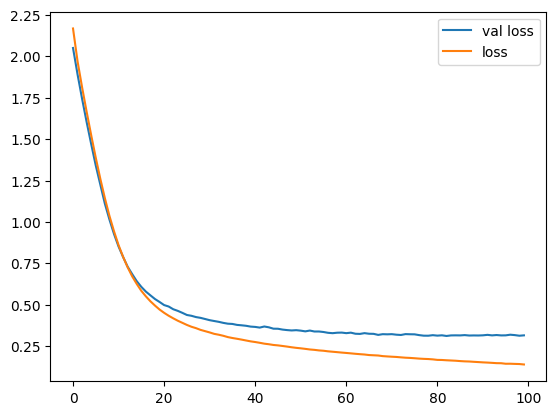

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label="val loss")
plt.plot(history.history['loss'],label="loss")
plt.legend()

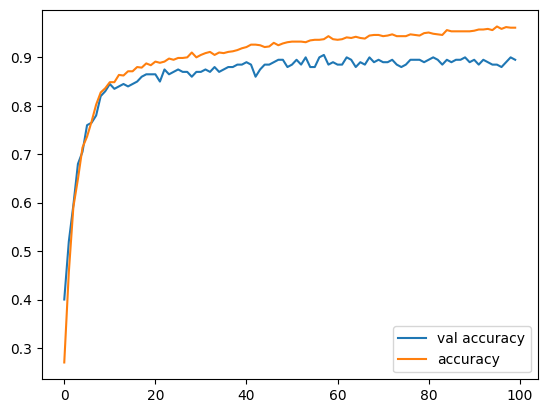

In [88]:
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.plot(history.history['accuracy'],label="accuracy")
plt.legend()

In [90]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"loss is {loss:.2f} and accuracy is {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.2614 
loss is 0.26 and accuracy is 0.92


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The max probability for sample 5 is 0.9959 and predicted value is 5, actual value is 5


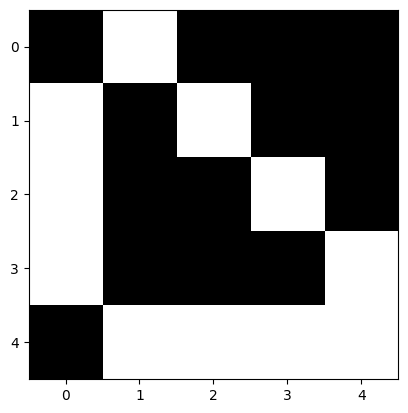

In [111]:
y_test_predicted = model.predict(X_test) # probability of each value
sample = 5
print(f"The max probability for sample {sample} is {y_test_predicted[sample].max():.4f} and\
 predicted value is {y_test_predicted[sample].argmax()}, actual value is {y_test[sample].argmax()}")
plt.imshow(X_test[sample].reshape(5,5), cmap="gray", label=f"resized image of sample {sample}")

In [ ]:
# all predicted values
y_test_predicted.argmax(axis=1)

array([7, 2, 3, 9, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 2, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 2, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 7, 2,
       1, 2, 7, 9, 0, 3, 7, 5, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 6, 6,
       2, 4, 2, 4, 4, 5, 9, 1, 8, 4, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 7, 2, 3, 1, 0, 2, 9, 6, 3, 5, 5, 0, 0, 9,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 9,
       5, 2, 9, 0, 3, 1, 8, 2, 2, 3, 5, 2, 9, 3, 8, 2, 7, 0, 9, 9, 0, 7,
       6, 5, 4, 4, 9, 3, 7, 0, 7, 4, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 1, 3, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 0,
       9, 5])

In [113]:
# show which of them is oredicted correctly
y_test_predicted.argmax(axis=1) == y_test.argmax(axis=1)

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

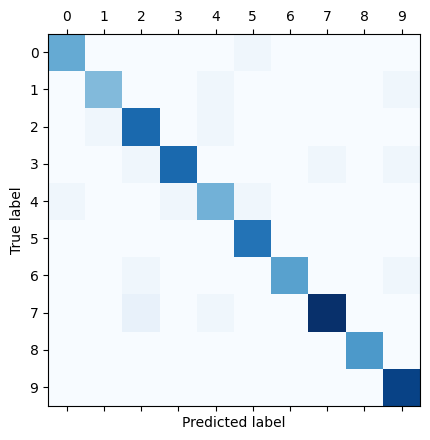

In [120]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test.argmax(axis=1),y_test_predicted.argmax(axis=1)),cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");